In [1]:
#Objective:
    # Train a bagging classifier on a 2D synthetic dataset.
    # Visualize the decision boundary.
    # Compare the effect of bagging (ensemble) vs. a single decision tree.

In [2]:
# Instructions:
    # Generate a 2D toy dataset using sklearn.datasets.make_moons with noise.
    # Split the data into training and test sets
    # Train two classifiers
        # A single DecisionTreeClassifier
        # A BaggingClassifier with DecisionTreeClassifier as base estimators
    # Plot:
        # The training points
        # The decision boundary of each classifier side-by-side for comparison

In [3]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [6]:
#generate synthetic data
X,y = make_moons(n_samples=300, noise=0.25, random_state=42)

In [8]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
tree = DecisionTreeClassifier(random_state=42)

In [24]:
bagging=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100, max_samples=0.8, max_features=1.0, bootstrap=True, random_state=42)

tree.fit(X_train, y_train)
bagging.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


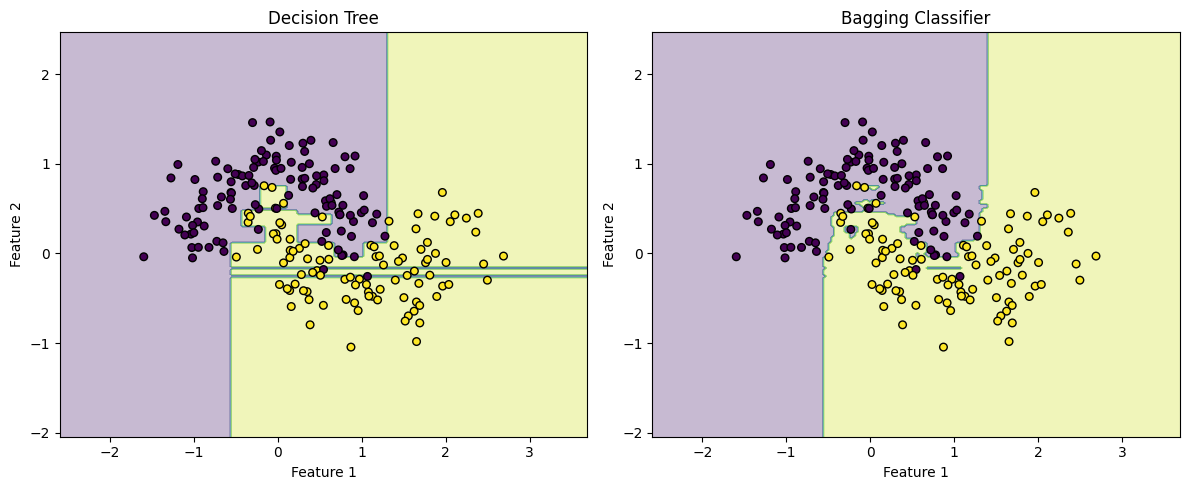

In [25]:
def plot_decision_boundary(clf, X, y , ax, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=30)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# 5. Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12,5))
plot_decision_boundary(tree, X_train, y_train, axs[0], 'Decision Tree')
plot_decision_boundary(bagging, X_train, y_train, axs[1], 'Bagging Classifier')

plt.tight_layout()
plt.show()